In [1]:
#Importing the Dependencies

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Dataset source :Kaggle [PIMA(Pima Indians Diabetes Database) Diabetes]

diabetes= pd.read_csv('diabetes.csv') 


In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.shape

(768, 9)

In [5]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [7]:
diabetes.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [8]:
diabetes.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [9]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

 Data Visualization

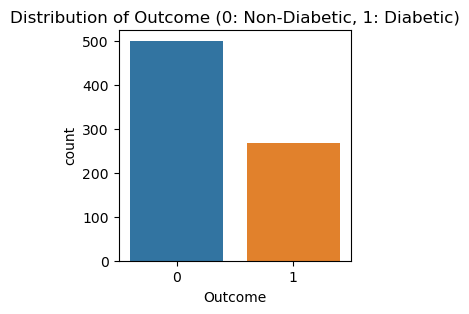

In [10]:
plt.figure(figsize=(3,3))
sns.countplot(x='Outcome', data=diabetes)
plt.title('Distribution of Outcome (0: Non-Diabetic, 1: Diabetic)')
plt.show()

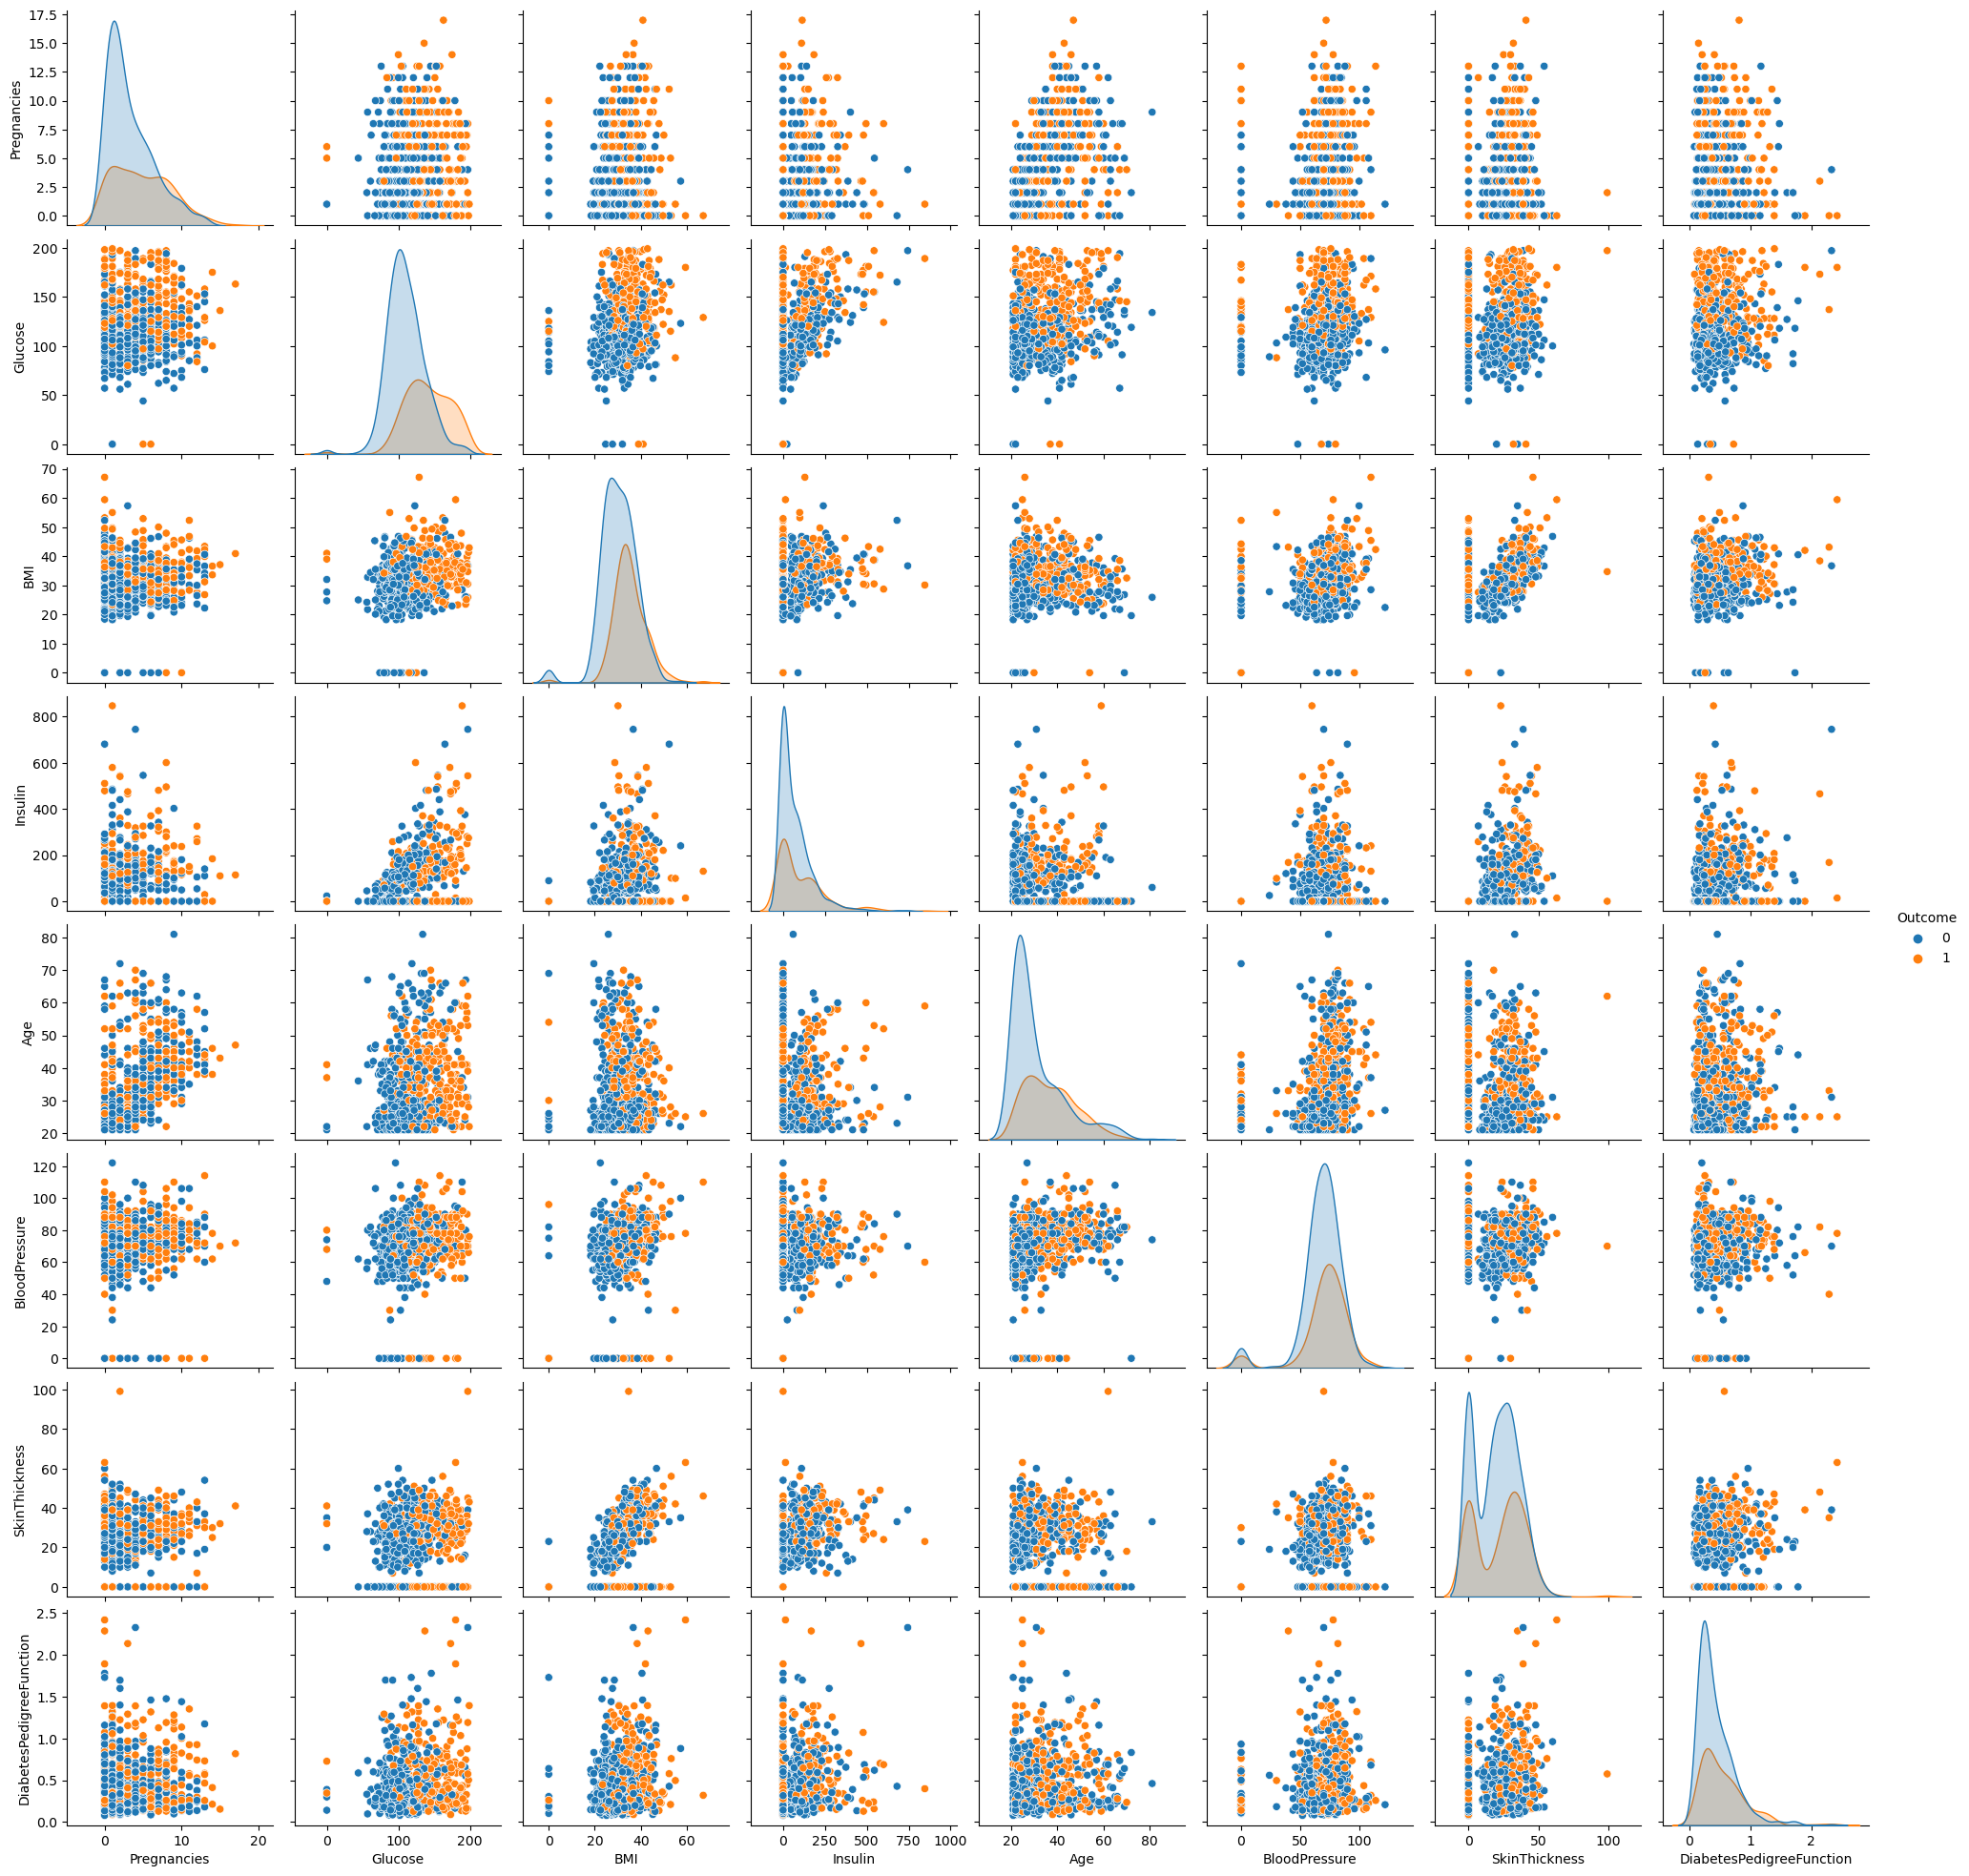

In [11]:
sns.pairplot(diabetes, vars=['Pregnancies','Glucose', 'BMI', 'Insulin', 'Age','BloodPressure','SkinThickness','DiabetesPedigreeFunction'], hue='Outcome')
plt.show()

In [12]:
diabetes.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [13]:
# separating the data and labels
X = diabetes.drop(columns = 'Outcome', axis=1)
Y = diabetes['Outcome']

In [14]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


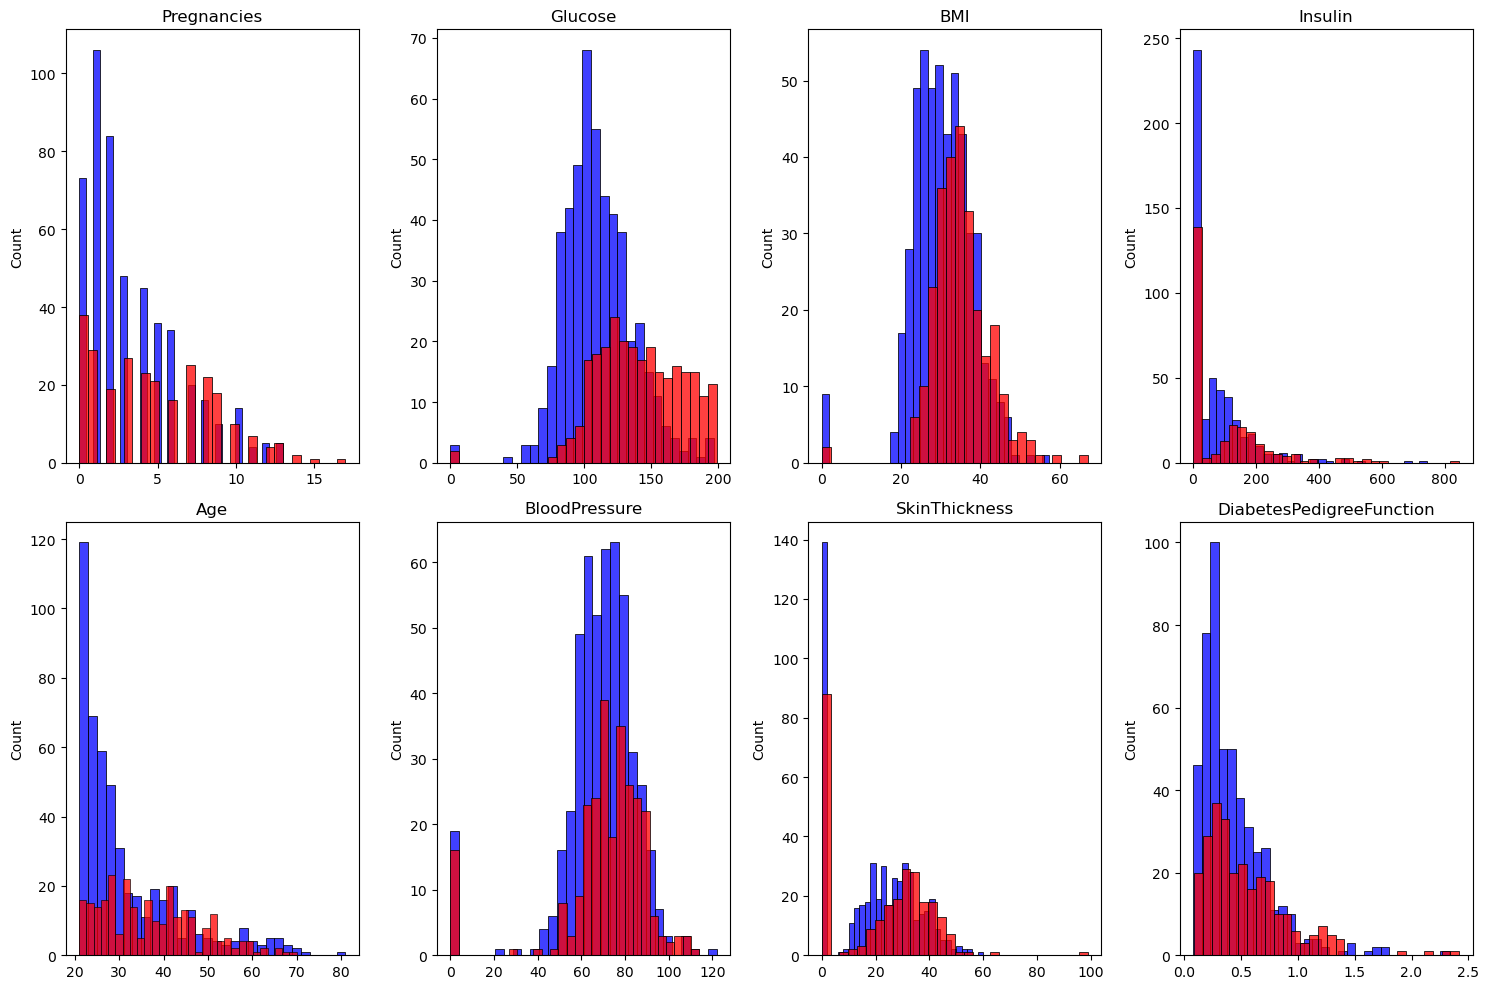

In [15]:
features = ['Pregnancies', 'Glucose', 'BMI', 'Insulin', 'Age', 'BloodPressure', 'SkinThickness', 'DiabetesPedigreeFunction']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 4, i)
    sns.histplot(diabetes[feature][diabetes['Outcome']==0], bins=30, color='b', label='No Diabetes')
    sns.histplot(diabetes[feature][diabetes['Outcome']==1], bins=30, color='r', label='Diabetes')
    plt.xlabel(feature)
    plt.title(feature)
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

Data Standardization

In [16]:
scaler = StandardScaler()

In [17]:
scaler.fit(X)

StandardScaler()

In [18]:
standardized = scaler.transform(X)

In [19]:
print(standardized)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [20]:
X = standardized
Y = diabetes['Outcome']

In [21]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


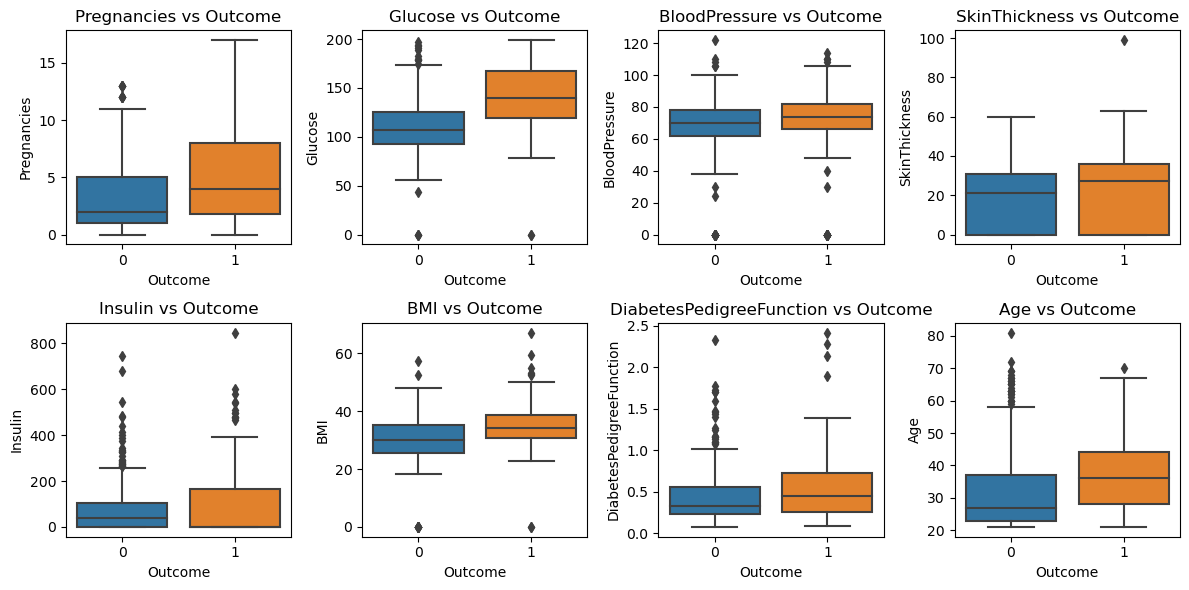

In [22]:
plt.figure(figsize=(12, 6))
for i, column in enumerate(diabetes.columns[:-1]):
    plt.subplot(2, 4, i+1)
    sns.boxplot(x='Outcome', y=column, data=diabetes)
    plt.title(f'{column} vs Outcome')
plt.tight_layout()
plt.show()

Train Test Split 

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the Model

In [25]:
classifier = svm.SVC(kernel='linear')

In [26]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

In [27]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

Accuracy Score

In [28]:
# accuracy score on the train data
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7866449511400652


In [29]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [30]:
# accuracy score on the test data
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.7727272727272727


In [31]:

conf_matrix = confusion_matrix(X_test_prediction, Y_test)
class_report = classification_report(X_test_prediction, Y_test)

print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[91 26]
 [ 9 28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       117
           1       0.52      0.76      0.62        37

    accuracy                           0.77       154
   macro avg       0.71      0.77      0.73       154
weighted avg       0.82      0.77      0.79       154



C:\Users\chint\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


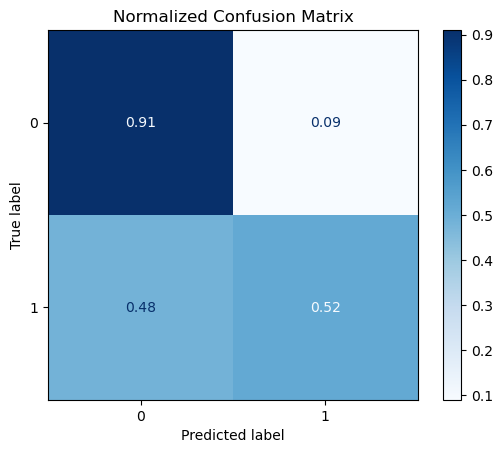

In [32]:
disp = plot_confusion_matrix(classifier, X_test, Y_test, cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title('Normalized Confusion Matrix')
plt.show()

In [33]:
#Making a Predictive System

input_data = (5,166,72,19,175,25.8,0.587,51)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


C:\Users\chint\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [34]:
correlation_matrix = diabetes.corr()
print(correlation_matrix)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

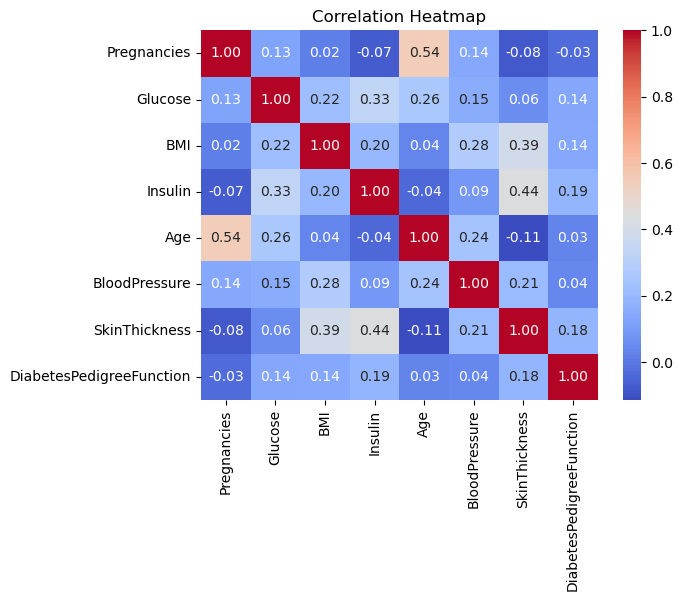

In [35]:
sns.heatmap(diabetes[['Pregnancies','Glucose', 'BMI', 'Insulin', 'Age','BloodPressure','SkinThickness','DiabetesPedigreeFunction']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()